<a href="https://colab.research.google.com/github/neelkantnewra/Data-cleaning/blob/main/Gpu_using.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [4]:
train_labels =  []
train_samples = []

In [5]:
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [9]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels,train_samples = shuffle(train_labels,train_samples)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scale_train_sample = scaler.fit_transform(train_samples.reshape(-1,1))

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy

In [14]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(f"number of physical device: {len(physical_devices)}")

tf.config.experimental.set_memory_growth(physical_devices[0],True)


number of physical device: 1


In [17]:
model = Sequential([
                    Dense(units=16,input_shape = (1,),activation='relu'),
                    Dense(units=32,activation='relu'),
                    Dense(units=2,activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(x=scale_train_sample,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,
          shuffle=True,verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.2531 - accuracy: 0.9407 - val_loss: 0.3046 - val_accuracy: 0.9143
Epoch 2/30
189/189 - 0s - loss: 0.2522 - accuracy: 0.9402 - val_loss: 0.3045 - val_accuracy: 0.9143
Epoch 3/30
189/189 - 0s - loss: 0.2515 - accuracy: 0.9402 - val_loss: 0.3049 - val_accuracy: 0.9143
Epoch 4/30
189/189 - 0s - loss: 0.2505 - accuracy: 0.9439 - val_loss: 0.3052 - val_accuracy: 0.9143
Epoch 5/30
189/189 - 0s - loss: 0.2498 - accuracy: 0.9402 - val_loss: 0.3033 - val_accuracy: 0.9190
Epoch 6/30
189/189 - 0s - loss: 0.2491 - accuracy: 0.9476 - val_loss: 0.3044 - val_accuracy: 0.9143
Epoch 7/30
189/189 - 0s - loss: 0.2485 - accuracy: 0.9423 - val_loss: 0.3045 - val_accuracy: 0.9143
Epoch 8/30
189/189 - 0s - loss: 0.2477 - accuracy: 0.9450 - val_loss: 0.3043 - val_accuracy: 0.9143
Epoch 9/30
189/189 - 0s - loss: 0.2472 - accuracy: 0.9444 - val_loss: 0.3039 - val_accuracy: 0.9190
Epoch 10/30
189/189 - 0s - loss: 0.2467 - accuracy: 0.9444 - val_loss: 0.3040 - val_accuracy: 0.9143

In [22]:
test_labels =  []
test_samples = []

In [23]:
for i in range(10):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [25]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels,test_samples = shuffle(test_labels,test_samples)

In [26]:
scale_test_sample = scaler.fit_transform(test_samples.reshape(-1,1))

In [27]:
prediction = model.predict(x=scale_test_sample,batch_size=10,verbose=0)

In [29]:
rounded_prediction = np.argmax(prediction,axis=-1)

# confusion Matrix

In [37]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [38]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_prediction)

In [41]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title = 'Confusion Matrix',
                          cmap= plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:np.newaxis]
    print("Normalized confusion Matrix")
  else:
    print('Confusion matrix, without normalisation')

  print(cm)
  
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment = 'center',
             color = 'white' if cm[i,j]>thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalisation
[[192  18]
 [ 10 200]]


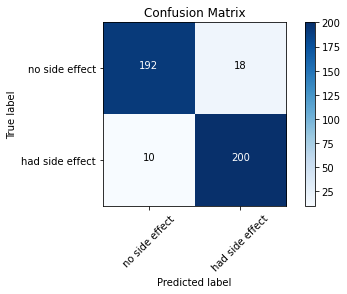

In [42]:
cm_plot_labels = ['no side effect','had side effect']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title= "Confusion Matrix")

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.save("medical_trial_model.h5")

In [45]:
from tensorflow.keras.models import load_model

new_model = load_model("/content/medical_trial_model.h5")

In [46]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [48]:
new_model.optimizer